# Telecommunication project.

In [ ]:
### Telecommunication project. 
#importing the libraries. 
import numpy as np
import pandas as pd


In [ ]:
# Add the datasets needed for this project. 
# the data sets will be arranged as dataframes to allow for speedy analysis using pandas or numpy
cellgeo = pd.read_csv('/content/cells_geo.csv')
cellgeo.head ()

,;VILLES;STATUS;LOCALISATION;DECOUPZONE;ZONENAME;LONGITUDE;LATITUDE;REGION;AREA;CELL_ID;SITE_CODE
0,"0;ADJAME;In Service;ABIDJAN;""""""Abidjan_EST"";AG..."
1,"1;ADJAME;In Service;ABIDJAN;""""""Abidjan_EST"";AG..."
2,"2;ADJAME;In Service;ABIDJAN;""""""Abidjan_EST"";AG..."
3,"3;ASSINIE;In Service;INTERIEUR;Grand-EST;""ASSI..."
4,"4;ASSINIE;In Service;INTERIEUR;Grand-EST;""ASSI..."


In [ ]:
# Telecom data set 1
tdset1 = pd.read_csv ('/content/Telcom_dataset.csv')
tdset1.head()

,PRODUTC,VALUE,DATETIME,CELL_ON_SITE,DW_A_NUMBER_INT,DW_B_NUMBER_INT,COUNTRY_A,COUNTRY_B,CELL_ID,SITE_ID
0,Voice,0,2012-05-06 23:04:37.0,1,49fae048b547780,1a49f8b0ded9de6,19e2e,19e2e,/TJNe+Mmtu,/TJNe+Mmtu
1,sms,0,2012-05-06 23:05:25.0,0,7a54a6eaee19e65,93343ba6e41af95,19e2e,19e2e,/+cKZKIp41,/+cKZKIp41
2,sms,25,2012-05-06 23:05:41.0,0,6008887b0207d82,7aacc9709ce0a20,19e2e,19e2e,/u0FSD+ahi,/u0FSD+ahi
3,Voice,56,2012-05-06 23:05:42.0,1,7370032e20f4e96,6af4a60e74c91d3,19e2e,19e2e,+cNeJzsTp3,+cNeJzsTp3
4,Voice,14,2012-05-06 23:06:29.0,1,966ba4656e38e62,02aa736ee555d5c,19e2e,19e2e,051KhYDCpv,051KhYDCpv


In [ ]:
# Telecom dataset 2 
tdset2 = pd.read_csv ('/content/Telcom_dataset2.csv')
tdset2.head()


,PRODUCT,VALUE,DATE_TIME,CELL_ON_SITE,DW_A_NUMBER,DW_B_NUMBER,COUNTRY_A,COUNTRY_B,CELL_ID,SITE_ID
0,sms,0,2012-05-07 23:02:06.0,2,32255675c3b6fe3,1aa7ae01386e9fb,19e2e,19e2e,+854AcBQT2,+854AcBQT2
1,Voice,0,2012-05-07 23:03:44.0,1,ff16d6ac74c1c64,87d87309c15a8c9,19e2e,19e2e,+854AcBQT2,+854AcBQT2
2,sms,0,2012-05-07 23:04:06.0,0,98d9f2fb5ff624b,93343ba6e41af95,19e2e,19e2e,+laSrk7g6q,+laSrk7g6q
3,Voice,37,2012-05-07 23:04:48.0,1,3f9c8a33ec7be1f,7d05a38f89c49d8,19e2e,19e2e,/xvRrCVKoQ,/xvRrCVKoQ
4,sms,25,2012-05-07 23:04:58.0,1,7bcccc03adf3864,56a5d5430d2fa86,19e2e,19e2e,+bO+qkSonO,+bO+qkSonO


In [ ]:
# Telecom Dataset 3
tdset3 = pd.read_csv ('/content/Telcom_dataset3.csv')
tdset3.head()

,PRODUCT,VALUE,DATE_TIME,CELL_ON_SITE,DW_A_NUMBER_INT,DW_B_NUMBER_INT,COUNTRY_A,COUNTRY_B,CELLID,SIET_ID
0,Voice,61,2012-05-08 23:01:28.0,2,966f68353622feb,ffd53a3bb2db6f1,19e2e,19e2e,+38u2u/rfx,+38u2u/rfx
1,sms,0,2012-05-08 23:01:31.0,1,a0a597384c612d7,cf3b218f1dde792,19e2e,19e2e,+Fs4mTvdKx,+Fs4mTvdKx
2,Voice,10,2012-05-08 23:02:59.0,1,5441a9a58c97132,52f8b299515b9b7,19e2e,19e2e,+ZaaZozy/+,+ZaaZozy/+
3,sms,0,2012-05-08 23:03:04.0,0,8ab8b9ed6989f61,e09e736e46c5c3d,19e2e,19e2e,+cNeJzsTp3,+cNeJzsTp3
4,Voice,22,2012-05-08 23:03:16.0,4,52662a62b199334,2186273faab4602,19e2e,19e2e,/eeMklgyJA,/eeMklgyJA


# Cleaning the Cells_geo dataframe

In [ ]:
#cleaning the cells_geo csv
new_cellsgeo = cellgeo[';VILLES;STATUS;LOCALISATION;DECOUPZONE;ZONENAME;LONGITUDE;LATITUDE;REGION;AREA;CELL_ID;SITE_CODE'].apply(lambda x: pd.Series([i for i in reversed(x.lower().split(';'))]))
# adding the columns
new_cellsgeo.columns = ['SITE_CODE','CELL_ID','AREA', 'REGION', 'LATITUDE', 'LONGITUDE', 'ZONENAME', 'DECOUPZONE', 'LOCALISATION', 'STATUS', 'VILLES', 'Index']
new_cellsgeo
  


,SITE_CODE,CELL_ID,AREA,REGION,LATITUDE,LONGITUDE,ZONENAME,DECOUPZONE,LOCALISATION,STATUS,VILLES,Index
0,0bb492ef17,fbb2e75af3,,lagune,5.36819444444444,-4.00066666666667,agbannew,"""""""abidjan_est""",abidjan,in service,adjame,0
1,0bb492ef17,1502501d78,,lagune,5.36819444444444,-4.00066666666667,agbannew,"""""""abidjan_est""",abidjan,in service,adjame,1
2,0bb492ef17,0c2e182a0c,,lagune,5.36819444444444,-4.00066666666667,agbannew,"""""""abidjan_est""",abidjan,in service,adjame,2
3,8a1e6ce31f,69bdfc69fd,,sud comoe,5.15876111111111,-3.48846666666667,"""assinie""""""",grand-est,interieur,in service,assinie,3
4,8a1e6ce31f,7a1029d2ab,,sud comoe,5.15876111111111,-3.48846666666667,"""assinie""""""",grand-est,interieur,in service,assinie,4
...,...,...,...,...,...,...,...,...,...,...,...,...
3969,f91ed8d2e9,1cfc2d7ab1,centre north,marahoue,7.42861111111111,-6.03969444444444,zone a - grand-nord,grand-nord,interieur,in service,zuenoula,3969
3970,f91ed8d2e9,3ae1708153,centre north,marahoue,7.42861111111111,-6.03969444444444,zone a - grand-nord,grand-nord,interieur,in service,zuenoula,3970
3971,61bee9c70c,cb71f8a29c,centre north,marahoue,7.44459166666667,-6.06545,zone a - grand-nord,grand-nord,interieur,in service,zuenoula,3971
3972,61bee9c70c,d4a6a0b645,centre north,marahoue,7.44459166666667,-6.06545,zone a - grand-nord,grand-nord,interieur,in service,zuenoula,3972


# Optimum time for the Upgrade to be deployed. 

In [ ]:
# finding out the times 
# Telcom_dataset.csv
def remove_zero(DATETIME):
    return str(DATETIME.replace(".0","").replace(",",""))
tdset1['DATETIME'] = tdset1['DATETIME'].map(remove_zero)
tdset1.head()

,PRODUTC,VALUE,DATETIME,CELL_ON_SITE,DW_A_NUMBER_INT,DW_B_NUMBER_INT,COUNTRY_A,COUNTRY_B,CELL_ID,SITE_ID
0,Voice,0,2012-05-06 23:04:37,1,49fae048b547780,1a49f8b0ded9de6,19e2e,19e2e,/TJNe+Mmtu,/TJNe+Mmtu
1,sms,0,2012-05-06 23:05:25,0,7a54a6eaee19e65,93343ba6e41af95,19e2e,19e2e,/+cKZKIp41,/+cKZKIp41
2,sms,25,2012-05-06 23:05:41,0,6008887b0207d82,7aacc9709ce0a20,19e2e,19e2e,/u0FSD+ahi,/u0FSD+ahi
3,Voice,56,2012-05-06 23:05:42,1,7370032e20f4e96,6af4a60e74c91d3,19e2e,19e2e,+cNeJzsTp3,+cNeJzsTp3
4,Voice,14,2012-05-06 23:06:29,1,966ba4656e38e62,02aa736ee555d5c,19e2e,19e2e,051KhYDCpv,051KhYDCpv


In [ ]:
# first convert the DATETME Column in the telecom data sets to a datetime dtype
tdset1['DATETIME'] = pd.to_datetime(tdset1['DATETIME'])
tdset1['DATETIME'].describe

#second we xshould resample the date time to 
tdset1.resample('300S', on ="DATETIME").VALUE.count()

DATETIME
2012-05-06 23:00:00       1
2012-05-06 23:05:00      17
2012-05-06 23:10:00      27
2012-05-06 23:15:00      47
2012-05-06 23:20:00      34
2012-05-06 23:25:00      53
2012-05-06 23:30:00      55
2012-05-06 23:35:00      85
2012-05-06 23:40:00      67
2012-05-06 23:45:00      91
2012-05-06 23:50:00      85
2012-05-06 23:55:00     100
2012-05-07 00:00:00    4339
Freq: 300S, Name: VALUE, dtype: int64

In [ ]:
# Telecom_Dataset2
def remove_zero(DATE_TIME):
    return str(DATE_TIME.replace(".0","").replace(",",""))
tdset2['DATE_TIME'] = tdset2['DATE_TIME'].map(remove_zero)
tdset2.head()

,PRODUCT,VALUE,DATE_TIME,CELL_ON_SITE,DW_A_NUMBER,DW_B_NUMBER,COUNTRY_A,COUNTRY_B,CELL_ID,SITE_ID
0,sms,0,2012-05-07 23:02:06,2,32255675c3b6fe3,1aa7ae01386e9fb,19e2e,19e2e,+854AcBQT2,+854AcBQT2
1,Voice,0,2012-05-07 23:03:44,1,ff16d6ac74c1c64,87d87309c15a8c9,19e2e,19e2e,+854AcBQT2,+854AcBQT2
2,sms,0,2012-05-07 23:04:06,0,98d9f2fb5ff624b,93343ba6e41af95,19e2e,19e2e,+laSrk7g6q,+laSrk7g6q
3,Voice,37,2012-05-07 23:04:48,1,3f9c8a33ec7be1f,7d05a38f89c49d8,19e2e,19e2e,/xvRrCVKoQ,/xvRrCVKoQ
4,sms,25,2012-05-07 23:04:58,1,7bcccc03adf3864,56a5d5430d2fa86,19e2e,19e2e,+bO+qkSonO,+bO+qkSonO


In [ ]:
# first convert the DATE_TiME Column in the telecom data sets to a date_time dtype
tdset2['DATE_TIME'] = pd.to_datetime(tdset2['DATE_TIME'])
tdset2['DATE_TIME'].describe

#second we should resample the date time to 
tdset2.resample('300S', on ="DATE_TIME").VALUE.count()

DATE_TIME
2012-05-07 23:00:00       5
2012-05-07 23:05:00      20
2012-05-07 23:10:00      35
2012-05-07 23:15:00      39
2012-05-07 23:20:00      54
2012-05-07 23:25:00      66
2012-05-07 23:30:00      58
2012-05-07 23:35:00      91
2012-05-07 23:40:00      75
2012-05-07 23:45:00      95
2012-05-07 23:50:00     120
2012-05-07 23:55:00     108
2012-05-08 00:00:00    4235
Freq: 300S, Name: VALUE, dtype: int64

In [ ]:
# Telcom_dataset3.csv
#remove the 0 at the end using the function already specified above
tdset3['DATE_TIME'] = tdset3['DATE_TIME'].map(remove_zero)
tdset3.head()

,PRODUCT,VALUE,DATE_TIME,CELL_ON_SITE,DW_A_NUMBER_INT,DW_B_NUMBER_INT,COUNTRY_A,COUNTRY_B,CELLID,SIET_ID
0,Voice,61,2012-05-08 23:01:28,2,966f68353622feb,ffd53a3bb2db6f1,19e2e,19e2e,+38u2u/rfx,+38u2u/rfx
1,sms,0,2012-05-08 23:01:31,1,a0a597384c612d7,cf3b218f1dde792,19e2e,19e2e,+Fs4mTvdKx,+Fs4mTvdKx
2,Voice,10,2012-05-08 23:02:59,1,5441a9a58c97132,52f8b299515b9b7,19e2e,19e2e,+ZaaZozy/+,+ZaaZozy/+
3,sms,0,2012-05-08 23:03:04,0,8ab8b9ed6989f61,e09e736e46c5c3d,19e2e,19e2e,+cNeJzsTp3,+cNeJzsTp3
4,Voice,22,2012-05-08 23:03:16,4,52662a62b199334,2186273faab4602,19e2e,19e2e,/eeMklgyJA,/eeMklgyJA


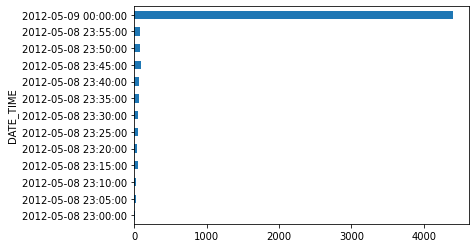

In [ ]:
# first convert the DATE_TiME Column in the telecom data sets to a date_time dtype
tdset3['DATE_TIME'] = pd.to_datetime(tdset3['DATE_TIME'])
tdset3['DATE_TIME'].describe

#second we should resample the date time to 
resampled_tdset3 = tdset3.resample('300S', on ="DATE_TIME").VALUE.count()
resampled_tdset3.plot (kind = "barh")

In [ ]:
""" The analysis of the time when the MTN company has maximum trafic in the three days is computed using the data above. 
After grouping the value of both voice and sms data in the Telecom Datasets for the three days. It is clear that at 23:00:00 
to 23:15:00 there is very little activity on the network. Therefore, this would be the optimum time for starting the upgrade 
as it will inconviniece the least amount of people. """ 

# Cities with the most use


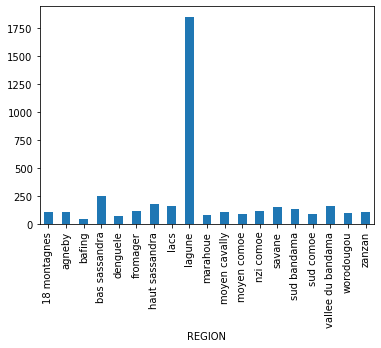

In [ ]:
#to find ou the cities with the most use I would fisrt need to join the two tables 
# The newly joined Dataframes are stored under the value of outer_df. The next df is for villes
from matplotlib import pyplot as plt 

spatial = new_cellsgeo [["CELL_ID", "VILLES", "REGION"]] 
outerdf = spatial.merge(tdset1, how='outer', on='CELL_ID')

villes = outerdf.pivot_table(index=['REGION'], aggfunc='size')
# villes.columns =  ['REGION', 'VILLES', 'NO_USER']
villes.sort_values (ascending=False). head (5)
villes.plot(kind='bar')

In [ ]:
# The top 5 cities with the most cell_id's from the Lagune region. 
villes = outerdf.pivot_table(index=['REGION', 'VILLES'], aggfunc='size')
villes.sort_values (ascending=False). head (5)


REGION  VILLES     
lagune  cocody         354
        yopougon       295
        abobo          255
        marcory        141
        treichville    132
dtype: int64

## ANALYSIS

In [ ]:
# From the above Data analysis, It is clear to see that the MTN telecommunication company has to plan their work accordingly 
# to reduce the incovinience to the clientelle. 
# # The data states that, the region with the most CELL_IDs is the Lagune region. 
# In the lagune region the Villes/cities with the most CELL_IDs is then listed. 